<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/ML_lab5_govno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [114]:
df = pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [115]:
# df = df.dropna().copy()
df.describe()
# NaN - нет

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [116]:
df["Performance Index"] = df["Performance Index"].astype("int64")
num_columns = df.select_dtypes(include=["int64"]).columns
df["Extracurricular Activities"] = df["Extracurricular Activities"].astype("category")
cat_columns = df.select_dtypes(include=["category"]).columns

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

**EDA**

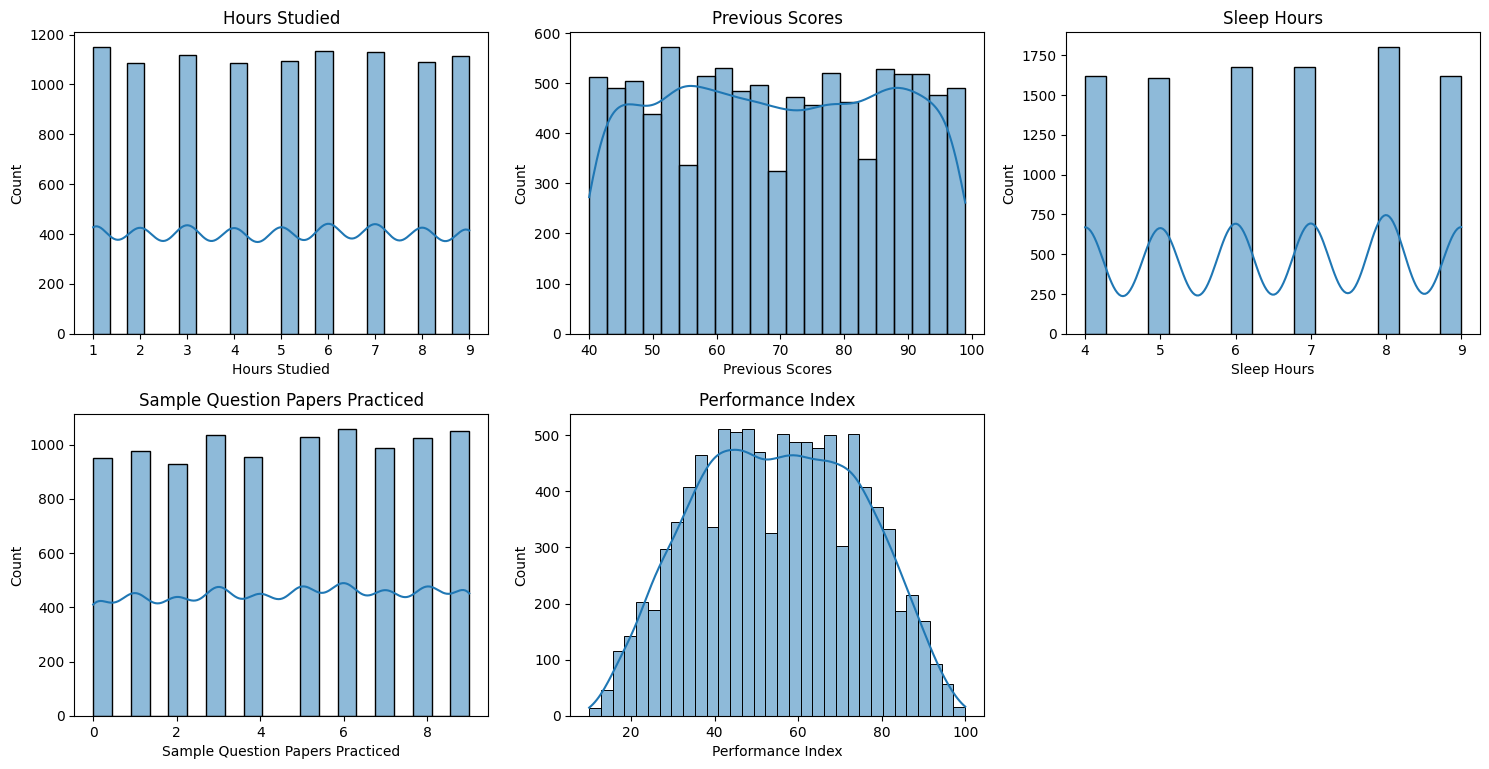

In [117]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(column)

plt.tight_layout()
plt.show()

Performance Index - более-менее нормальное распределение. Все остальное ровно.

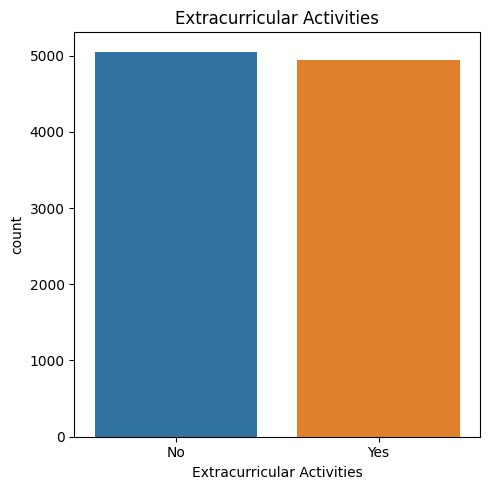

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x="Extracurricular Activities")
plt.title("Extracurricular Activities")

plt.tight_layout()
plt.show()

Студентов с внеклассовыми активностями и без примерно поровну.

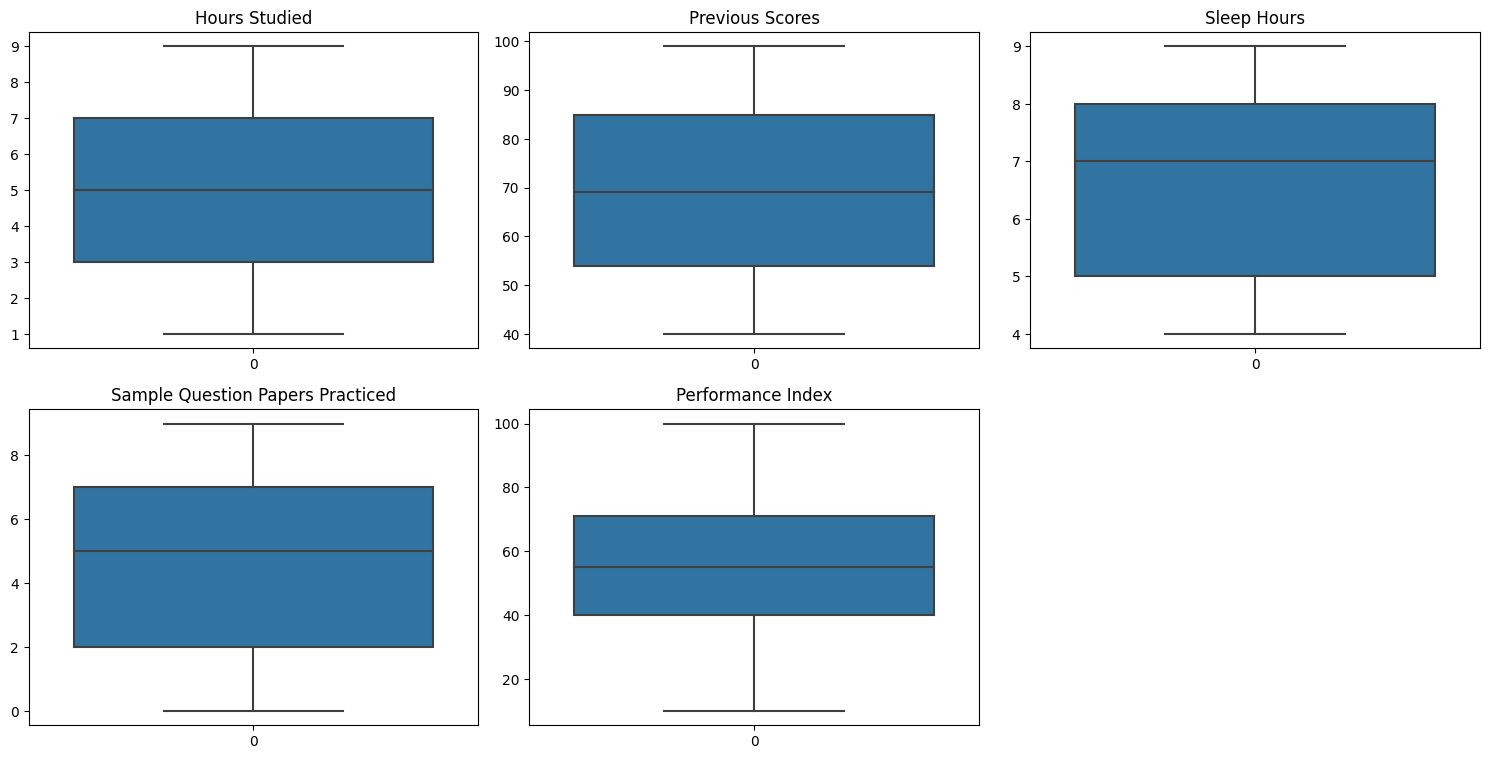

In [119]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

Как это понимать???

Зато выбросов нет
> Блок с отступами



**За целевую переменную возьмем Performance Index, как единственную адекватную метрику**

In [120]:
df.corr()["Performance Index"]

<ipython-input-120-199b4d6749d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Performance Index"]


Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

Из корреляции можно понять, что если ученик хорошо учился в прошлом семестре, то и в этом будет хорошо.

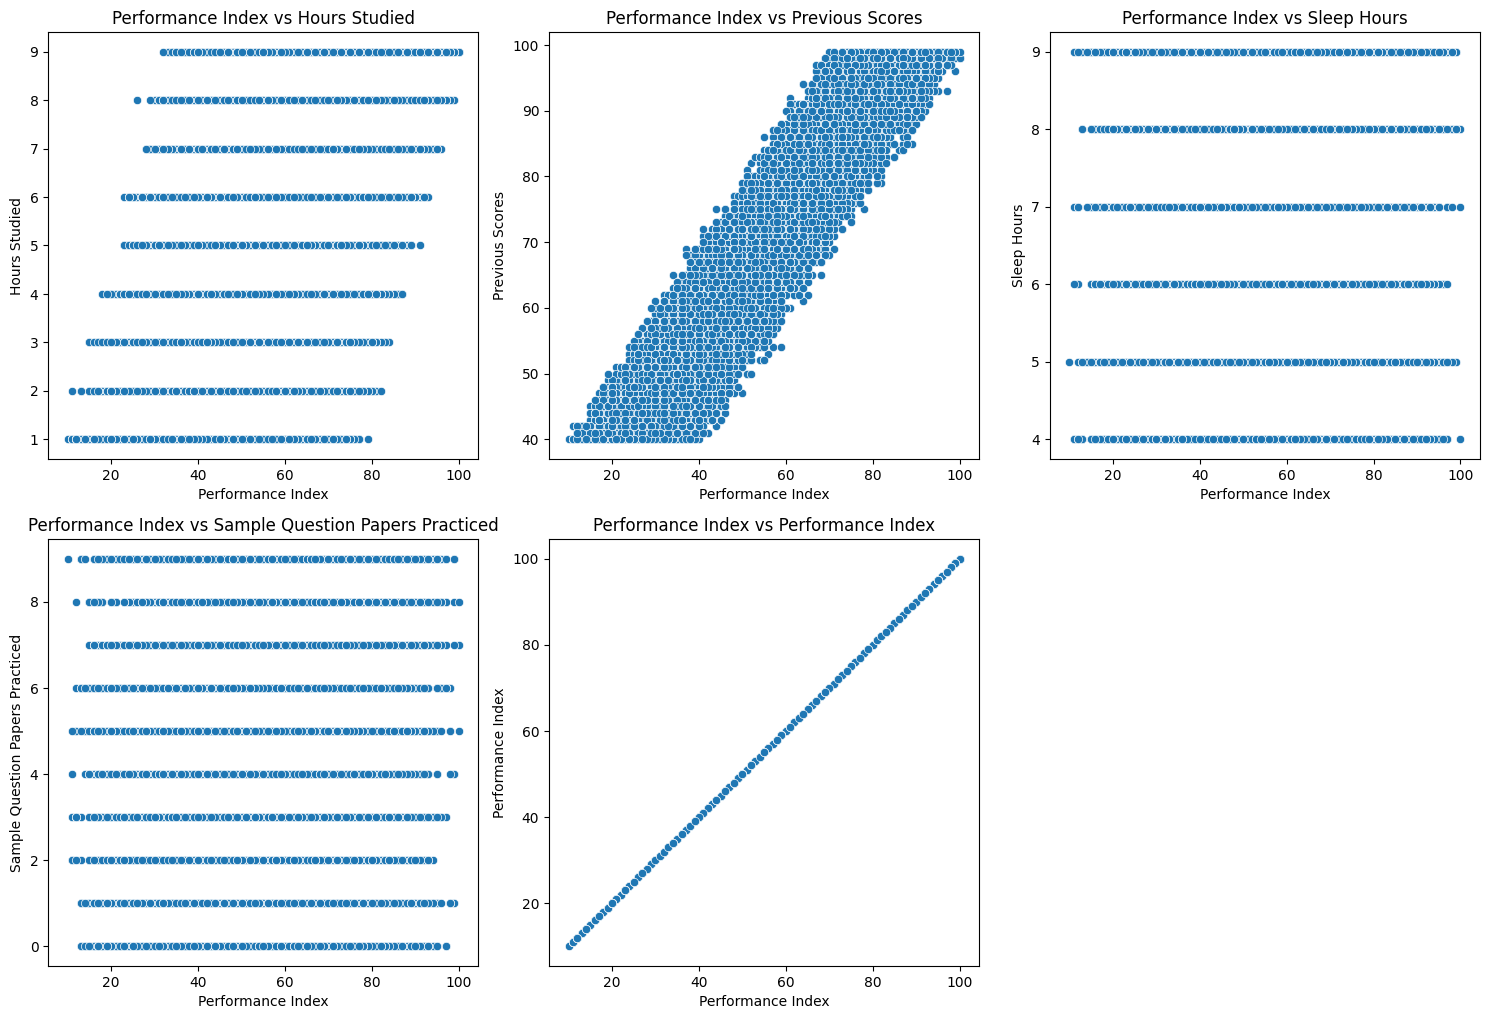

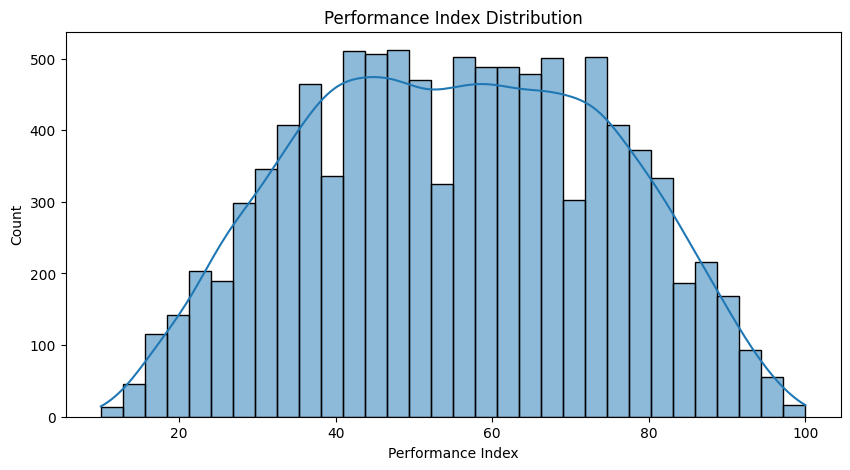

In [121]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x="Performance Index", y=column)
    plt.title(f'Performance Index vs {column}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Performance Index", kde=True)
plt.title("Performance Index Distribution")
plt.show()

Чет вообще

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [122]:
standard_scaler = StandardScaler()

st_scaled = df.copy()
st_scaled[num_columns] = standard_scaler.fit_transform(df[num_columns])
df[num_columns] = st_scaled[num_columns].copy()

In [123]:
encoder = OneHotEncoder()

for i, column in enumerate(cat_columns, 1):
  transformed = encoder.fit_transform(df[[column]])
  df[encoder.categories_[0]] = transformed.toarray()
df = df.drop(columns=cat_columns).copy()
df = df.rename(columns={"No": "No_EA", "Yes": "Yes_EA"}).copy()
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No_EA,Yes_EA
0,0.775188,1.704176,1.456205,-1.249754,1.862167,0.0,1.0
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818,1.0,0.0
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220,0.0,1.0
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687,0.0,1.0
4,0.775188,0.320275,0.866505,0.145333,0.560870,1.0,0.0
...,...,...,...,...,...,...,...
9995,-1.542149,-1.178951,-1.492294,-0.900982,-1.677362,0.0,1.0
9996,0.775188,-0.314013,0.866505,0.145333,0.144454,0.0,1.0
9997,0.388965,0.781575,0.866505,0.145333,0.977285,0.0,1.0
9998,1.547633,1.588851,0.276805,-1.598526,2.070374,0.0,1.0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

X = df.drop("Performance Index", axis=1).copy()
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  model = LinearRegression()
  model.fit(X, y)
  return model


def compute_metrics(y, predicted):
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [130]:
model = compute_regression(X_train, y_train)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 0.08428791581440102,
 'MSE': 0.011297480517085401,
 'R2': 0.9886898790682355,
 'mape (reverted - % верно угаданых)': 67.8303720104725,
 'mape (original - % ошибок)': 32.1696279895275}

In [127]:
model = compute_regression(X_train, y_train)
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 5.122369542420735e-16,
 'MSE': 3.855200519587305e-31,
 'R2': 1.0,
 'mape (reverted - % верно угаданых)': 99.99999999999983,
 'mape (original - % ошибок)': 1.7416374955895795e-13}

In [128]:
coefficients = model.coef_
coefficients

array([ 4.26113321e-16, -1.11022302e-16, -1.49186219e-16, -2.77555756e-17,
        1.00000000e+00,  2.05564732e-16,  1.17961196e-16])

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
"""
Код здесь
"""

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""